#  Corner solution responses

### Econometrics B (ØkB)

(Wooldridge Ch. 18)

Bertel Schjerning

Department of Economics, University of Copenhagen


# Introduction

## Corner Solution Models and Censored Regression
- Models explaining a continuous random variable with **probability mass a certain points**
- **Two fundamentally different types of truncation**
	1. Data censoring (ch 19)
	2. Corner Solutions (ch 18)

- Both cases are often modeled with the Tobit model - the main topic of today. 

- **Sample selection** (next topic) 
    - Example: When modeling earnings for self-employed, profits is only observed for self-employed 
    - often appears as similar type of **truncation**, but where we do not observe a truncated value - but entirely loose the observation 
    

## Example of data censoring: Top coding of wealth

**Top-coding of wealth above threshold**

\begin{eqnarray*}
y^{\ast } &:&\text{wealth - unobserved} \\
y &=&\min \left( y^{\ast },a\right) \text{ - observed}
\end{eqnarray*}

<img src="img/wealth_dist.png" alt="top coding of wealth" style="width: 600px;"/>

**$y$ is censored because of recording mechanism - not because of behavior**

## Example of corner solution: Demand
<table><tr>
    <td><img src="img/demand.png" alt="Demand" style="width: 600px;"><td>
    <td><img src="img/demand_dist.png" alt="Distribution of demand" style="width: 600px;"/><td>
</tr></table>

- Heterogeneity in income, prices and preferences $\rightarrow$ heterogeneity in demand

- Some combinations of income, prices and preferences $\rightarrow$  consumer chooses to consume zero of the good of interest
- Continuous distribution with mass point at $y=0$

### Corner Solution Examples: Data with mass points

**Textbook examples**
- Demand/Consumption (must be positive)
- Hours worked (must be positive)
- House valuation (must be positive)
- Firm exports (fixed costs of exporting -> corner solution)
- Charitable contributions (non negative)

Example from my own research on **taxation of self-employed**:
- Tax-system is piecewise linear kinks in the budget set for tax-payers (e.g. at to the middle and top-tax thresholds) 
- We should expect mass points at these kinks


### Example of corner solution outcome:  Self-employed and income shifting

![](img/leMaireSchjerning.png)
Empirical distribution of personal income of workers (left panel) and self-employed (right panel) in 2009. 

*Source: Le Maire & Schjerning, 'Tax bunching, income shifting and self-employment', Journal of Public Economics 2013* [[web link]](http://dx.doi.org/10.1016/j.jpubeco.2013.08.002).

- **Corner solution:** Bunching at the top tax rate cutoff.
- **Corner solution outcome model** can be used in this case.

### Need some libraries

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
import numpy as np 
from numpy import random
import matplotlib.pyplot as plt

# collection of functions used for this lecture on censored regression corner solution outcome models 
from tobit import * 

### Illustration:  Simulated data and observed frequencies

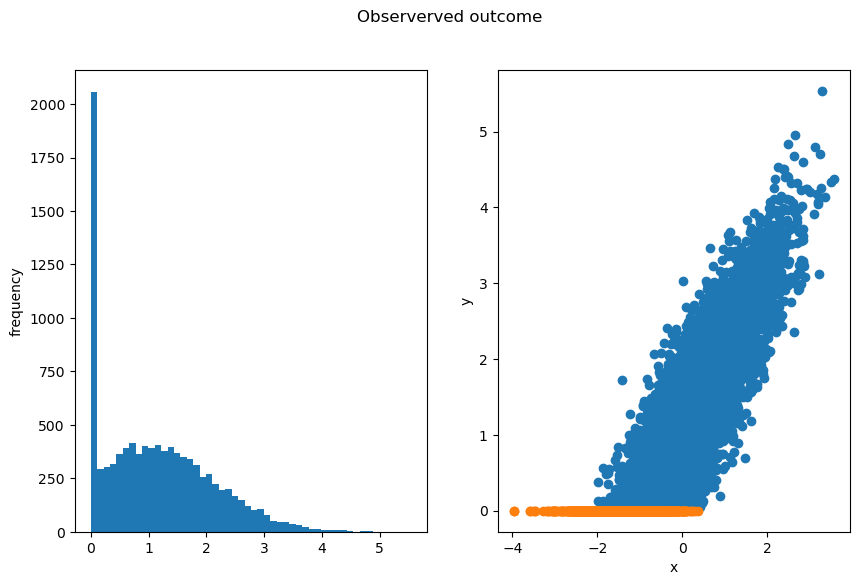

In [2]:
# generate data and plot distribution 
from tobit import * 
y, ys, x, u = sim_data(10000, beta=[1,1], sigma=.5)   # change beta to change amount of truncaton
x1=x[:,1].reshape(-1,1)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,6)) 
fig.suptitle('Observerved outcome')
ax1.hist(y, bins = 50); ax1.set_ylabel('y'); ax1.set_ylabel('frequency');
ax2.scatter(x1[y>0], y[y>0]) 
ax2.scatter(x1[y==0], y[y==0]); ax2.set_xlabel('x'); ax2.set_ylabel('y');
plt.show()

# The tobit model

## The tobit model
- Introduced by **James Tobin (1958)**.
- Underlying **latent variable model**:
$$y_i^\star = x_i\beta + \varepsilon_i
\qquad\qquad \varepsilon_i \sim \mathcal{N}(0, \sigma^2)$$
- **Observational rule**:
$$y_i = \begin{cases}
0 & \text{if $y_i^\star \leq 0$} \\
y_i^\star & \text{if $y_i^\star > 0$} \\
\end{cases}$$
- Alternative specification (equivalent):
$$y_i = \max\{0, y_i^\star\}$$

### Illustration: OLS observed ($y$) vs. latent ($y^\star$) vs. truncated ($y > 0$ only)

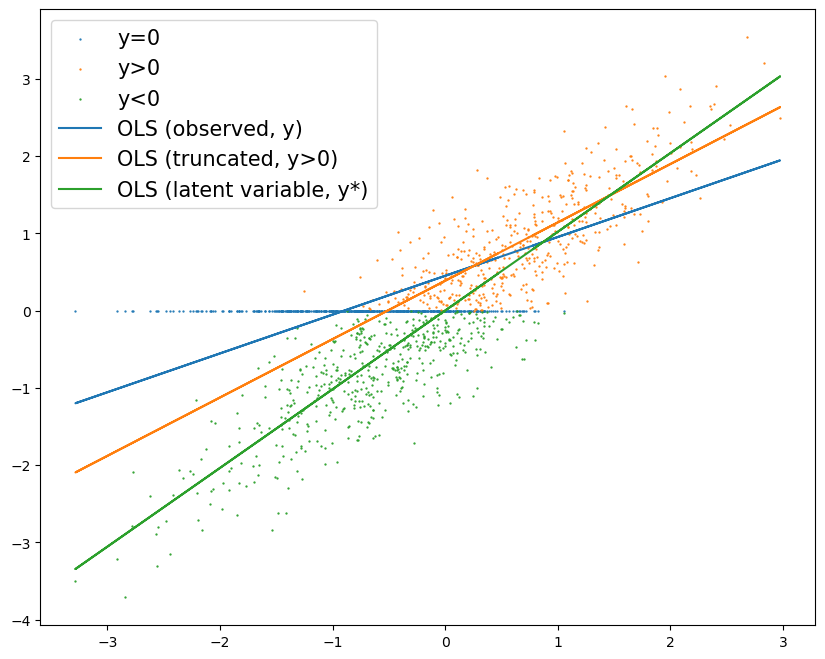

In [3]:
from tobit import * 
y, ys, x, u = sim_data(1000, beta=[0,1], sigma=0.5) # change parameters to change amount of truncation 
# scatter_ols(x,y) # scatter with regrssion line using only observed data
scatter_ols(x,y, ys) # add regrssion line using unobserved latent variable

# Maximum likelihood estimation

## Deriving the (log-)likelihood function
- The observational rule provides two cases:
$$f(y_i \mid x_i) = \begin{cases}
f_0(y_i \mid x_i) & \text{if $y_i = 0$} \\
f_1(y_i \mid x_i) & \text{if $y_i > 0$} \\
\end{cases}$$
- The **density function** can be condensed as:
$$f(y_i \mid x_i) = 
f_0(y_i \mid x_i)^{\mathbb{1}(y_i=0)}f_1(y_i \mid x_i)^{\mathbb{1}(y_i>0)}$$
where $\mathbb{1}(Z)$ is the **indicator function**, equal to 1 if $Z$ is true, 
to 0 otherwise.
- Splitting the density function in two parts is similar to what we did for
binary response models.
- **What are the expressions of $f_0(\cdot)$ and $f_1(\cdot)$?**

## Deriving the (log-)likelihood function (cont'd)

 **Case $y_i = 0$ (mass point at 0)**
$$f_0(y_i \mid x_i) 
\equiv P(y_i = 0 \mid x_i)
= P(y^\star_i \leq 0 \mid x_i)
= 1 - \Phi\left(\frac{x_i\beta}{\sigma}\right)$$
where $\Phi(\cdot)$ is the CDF of the standard normal distribution.

This is identical to the zero case in binary response models ($y_i^\star \leq 0$)


 **Case $y_i > 0$**
$$f_1(y_i \mid x_i) \equiv 
\frac{1}{\sigma}\phi\left(\frac{y_i-x_i\beta}{\sigma}\right)$$
where $\phi(\cdot)$ is the PDF of the standard normal distribution.

 **Putting the parts together**
$$f(y_i \mid x_i) = 
\left[1 - \Phi\left(\frac{x_i\beta}{\sigma}\right)\right]^{\mathbb{1}(y_i=0)}
\left[\frac{1}{\sigma}
  \phi\left(\frac{y_i-x_i\beta}{\sigma}\right)\right]^{\mathbb{1}(y_i>0)}$$

## Deriving the (log-)likelihood function (cont'd)

**Log-likelihood function** with parameters  $\theta = (\beta, \sigma)$ .. or $\theta = (\beta, \sigma^2)$
- **Individual contribution:**
$$\mathcal{L}_i(\theta) =
\mathbb{1}(y_i=0)\ln\left(1 - \Phi\left(\frac{x_i\beta}{\sigma}\right)\right) +
\mathbb{1}(y_i>0)\ln\left(\dfrac{1}{\sigma}
  \phi\left(\dfrac{y_i-x_i\beta}{\sigma}\right)\right)$$
  
- where the second term can be simplified as:
$$\ln\left(\dfrac{1}{\sigma}
  \phi\left(\dfrac{y_i-x_i\beta}{\sigma}\right)\right)
  = - \frac{1}{2}\ln(2\pi) - \frac{1}{2}\ln\sigma^2  - 
    \frac{(y_i-x_i\beta)^2}{2\sigma^2}$$

- **Sample objective to be minimized** negative of sample average of log-likelihood
(as usual we assume *random sampling* of the observations):
$$Q_N(\theta) = - N^{-1}\sum_{i=1}^N \mathcal{L}_i(\theta)$$

### Python implementation of sample objective $Q_N(\theta) = - N^{-1}\sum_{i=1}^N \mathcal{L}_i(\theta)$

In [4]:
def Q_tobit(theta, y, x, out='Q'): # sample objective function and derivatives for tobit
    N, K = x.shape 
    theta=np.array(theta).reshape(K+1,1)
    beta=theta[:-1,:]
    sigma=theta[-1,:]
    Phi_i=norm.cdf(x@beta/sigma)
    Phi_i=np.minimum(np.maximum(Phi_i,1e-15),1-1e-15) 

    ll_i = 1*(y == 0)*np.log(1-Phi_i)  -  1*(y > 0)*((y-x@beta)**2/(2*sigma**2) + np.log(sigma**2)/2)
    if out=='Q': return -np.mean(ll_i)

    s_i=s_i_tobit(beta, sigma, y, x, Phi_i) # computes NxK array with scores 
    if out=='s_i': return s_i  # Return s_i
    if out=='dQ':  return -np.mean(s_i, axis=0);  # Return dQ: array of size K derivative of Q

## Score and first-order conditions

- The **score** is derived separately for $\beta$ and $\sigma^2$:

$$\frac{\partial\mathcal{L}_i(\theta)}{\partial\beta} = 
  \frac{1}{\sigma^2}\left[\mathbb{1}(y_i>0)(y_i-x_i\beta) -
  \mathbb{1}(y_i=0)\frac{\sigma\phi_i}{1-\Phi_i}
  \right] x_i$$
$$\frac{\partial\mathcal{L}_i(\theta)}{\partial\sigma} = 
  \left[
    \mathbb{1}(y_i>0)\left( -
      \frac{1}{1\sigma} + \frac{(y_i-x_i\beta)^2}{\sigma^3}
                \right) +
  \mathbb{1}(y_i=0)\frac{\phi_i}{1-\Phi_i}x_i\beta/\sigma^2
  \right]$$
- where:
    - $\phi_i \equiv \phi\left(x_i\beta/\sigma\right)$
    - $\Phi_i \equiv \Phi\left(x_i\beta/\sigma\right)$
    - $\partial\Phi(z)/\partial z = \phi(z)$ (relationship between CDF and PDF)

- **FOCs** impossible to solve analytically: **Numerical methods** are required.

### Python implementation of scores $\partial\mathcal{L}_i(\theta)/\partial\theta$

In [5]:
def s_i_tobit(beta, sigma, y, x, Phi_i): 
    # derivatives 
    phi_i=norm.pdf(x@beta/sigma)
    phi_i=np.minimum(np.maximum(phi_i,1e-15),1-1e-15) 
    s_i_beta= 1/sigma**2*((y > 0)*(y-x@beta) - 1*(y == 0)*sigma*phi_i/(1-Phi_i))*x 
    s_i_sigma =  1*(y == 0)*phi_i/(1-Phi_i)*x@beta/(sigma**2) 
    s_i_sigma += 1*(y > 0)*((y-x@beta)**2/(sigma**3) -1/(sigma))
    s_i=np.append(s_i_beta, s_i_sigma.reshape(-1,1),  axis=1)
    return s_i

### Estimation

In [6]:
from tobit import * 
y, ys, x, u = sim_data(10000, beta=[-2,1,-1], sigma=1) # change parameters to change amount of truncation 
res=tobit(y,x, deriv=1);

Tobit model
Fractions of observations that are censored:  0.873
Initial log-likelihood -1.079848140049113
Initial gradient
 [-1.938275    0.48679389 -0.47718036  2.83609762]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0             -1.93007     0.04321   -44.67011     0.00000
x1              0.97598     0.02036    47.94001    -0.00000
x2             -0.97323     0.02436   -39.95037    -0.00000
sigma           0.97415     0.02016    48.32612     0.00001
# of observations : 10000
# log-likelihood. : -1865.1466952419964 

Iteration info: 17 iterations, 19 evaluations of objective, and 19 evaluations of gradients
Elapsed time: 0.0401 seconds



### Identification

- Is $\sigma^2$ **identifiable**? *[in probit it is not!]*
- Can you think of examples where **identification might break down**?

In [7]:
y, ys, x, u= sim_data(10000, beta=[-5,1,-1], sigma=1) # change parameters to change amount of truncation 
res=tobit(y,x, deriv=1);

Tobit model
Fractions of observations that are censored:  0.998
Initial log-likelihood -1.206904049833717
Initial gradient
 [-19.65372284   0.59472116  -0.62506133  25.43373269]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0             -5.73132     1.06223    -5.39558     0.00000
x1              1.16977     0.23785     4.91809     0.00000
x2             -1.25107     0.25515    -4.90321    -0.00000
sigma           1.08102     0.19863     5.44234     0.00000
# of observations : 10000
# log-likelihood. : -58.570264977022816 

Iteration info: 48 iterations, 49 evaluations of objective, and 49 evaluations of gradients
Elapsed time: 0.0974 seconds



# Quantities of Interest: Conditional means and marginal effects

## Conditional means
Quantities of Interest depends on the type of problem we consider

**Data censoring:**
\begin{equation*}
E\left( y^{\ast }|x\right) =x\beta 
\end{equation*}

**Corner Solutions**
\begin{eqnarray*}
&&E\left( y|x\right) \\
&&E\left( y|x|y>0\right) \\
&&P\left( y=0|x\right) ,P\left( y>0|x\right) 
\end{eqnarray*}
and the partial effects on these.

## Marginal effects

- **Marginal effect:** Effect of a change in the regressors on the conditional
mean of the outcome.
- **Marginal effects** can be derived and computed for each of the conditional
means and probabilities derived above.
- Which effect is relevant **depends on your application**.
- Always explain *which* marginal effect you are looking at.

## Conditional probability: corner solutions (1/6)
$P\left( y=0|x\right) $ and $P\left( y>0|x\right) $ is easily calculated (same arguments as for probit)

\begin{eqnarray*}
P\left( y>0|x\right) &=& P\left( y^{\ast }>0|x\right) \\
&=&P\left( x\beta +u>0|x\right) \\
&=&\Phi \left( \frac{x^{\prime }\beta }{\sigma }\right) \\
P\left( y=0|x\right) &=& P\left( y^{\ast }\leq 0|x\right) \\
&=&1-\Phi \left( \frac{x^{\prime }\beta }{\sigma }\right) 
\end{eqnarray*}

## Conditional mean: corner solutions (2/6)
Decomposition of Conditional Expectation (By LIE)
\begin{eqnarray*}
E\left( y|x\right) &=&\underset{=0}{\underbrace{E\left( y|x,y\leq 0\right) }}
P\left( y\leq 0|x\right) \\
&&+E\left( y|x,y>0\right) P\left( y>0|x\right) \\
&=&E\left( y|x,y>0\right) P\left( y>0|x\right) 
\end{eqnarray*}

- Hence we still need to compute

\begin{equation*}
E\left( y|x,y>0\right)
\end{equation*}

## Conditional mean  of truncated normal: corner solutions (3/6)
Derivation of $E\left( y|x,y>0\right) $

\begin{eqnarray*}
E\left( y|x,y>0\right) &=& E\left( y^{\ast }|x,y^{\ast }>0\right) \\
&=&E\left( x\beta +u|x,y^{\ast }>0\right) \\
&=&E\left( x\beta +u|y^{\ast }>0\right)  \\
&&\text{due to independence between }u\text{ and }x \\
&=&x\beta +E\left( u|u>-x\beta \right) 
\end{eqnarray*}

## Conditional mean of truncated normal: corner Solutions (4/6)
**Digress: Truncated density**

\begin{eqnarray*}
f\left( z|z>c\right) &=&\frac{f\left( z\right) }{1-F\left( c\right) }\text{ }\\
\lbrack \text{ normalization} &\Longrightarrow &\text{Trunc density integrates to 1]}
\end{eqnarray*}

Suppose $z\sim N\left( 0,1\right)$
\begin{equation*}
f\left( z|z>c\right) =\frac{\phi \left( z\right) }{1-\Phi \left( c\right) }
\end{equation*}

Then
\begin{eqnarray*}
E\left[ z|z>c\right] &=& \int_{c}^{\infty }zf\left( z|z>c\right) dz\\
&=&\int_{c}^{\infty }z\frac{\phi \left( z\right) }{1-\Phi \left( c\right) }dz\\
&=&\frac{\phi \left( c\right) }{1-\Phi \left( c\right) }
\end{eqnarray*}

## Conditional mean  of truncated normal: corner solutions (5/6)
Using this result we now obtain $E\left( y|x,y>0\right)$
\begin{eqnarray*}
E\left( y|x,y>0\right) &=&
x\beta +\sigma E\left( \frac{u}{\sigma }|\frac{u}{\sigma }>-\frac{x\beta }{\sigma }\right) \\
&=&x\beta +\sigma \frac{\phi \left( -\frac{x\beta }{\sigma }\right) }{1-\Phi \left( -\frac{x\beta }{\sigma }\right) } \\
&=&x\beta +\sigma \frac{\phi \left( \frac{x\beta }{\sigma }\right) }{\Phi \left( \frac{x\beta }{\sigma }\right) }\\
&=&x\beta +\sigma \underset{\text{Inverse Mill's ratio}}{\underbrace{\lambda \left( x\beta /\sigma \right) }} \geq x\beta 
\end{eqnarray*}

## Conditional mean: Corner Solutions (6/6)

**Combining results** we now obtain $E\left( y|x\right)$
\begin{eqnarray*}
E\left( y|x\right) &=& E\left( y|x,y>0\right) P\left( y>0|x\right) \\
&=&\left[ x\beta +\sigma \lambda \left( \frac{x\beta }{\sigma }\right) \right] 
\Phi \left(\frac{x\beta }{\sigma }\right) \\
&=&x\beta \Phi \left( \frac{x\beta }{\sigma }\right)
+\sigma \phi \left( \frac{x\beta }{\sigma }\right) 
\end{eqnarray*}

**Note:** By the convexity of the $\max $ operator
\begin{eqnarray*}
E\left( \max \left( 0,y^{\ast }\right) |x\right) &\geq &\max \left(0,E\left( y^{\ast }|x\right) \right) \\
E\left( y|x\right) &\geq &\max \left( 0,x\beta \right) \geq 0
\end{eqnarray*}

## Quantities of Interest: summarizing results
**Data censoring**
- $E\left( y^{\ast }|x\right) =x\beta$ $\rightarrow$ constant partial effects

## Quantities of Interest: summarizing results
**Corner Solutions (1)**

\begin{eqnarray*}
E\left( y|x\right) &=&E\left( y|x,y>0\right) P\left( y>0|x\right) \\
&=&x\beta \Phi \left( \frac{x\beta }{\sigma }\right)
+\sigma \phi \left( \frac{x\beta }{\sigma }\right) \\
E\left( y|x,y>0\right) &=&x\beta +\sigma \underset{\text{Inverse
Mill's ratio}}{\underbrace{\lambda \left( x\beta /\sigma \right) }}\\
P\left( y>0|x\right) &=&\Phi \left( \frac{x\beta }{\sigma }\right)\\
P\left( y=0|x\right) &=&1-\Phi \left( \frac{x\beta }{\sigma }\right)
\end{eqnarray*}


We can neither use OLS to estimate $E\left( y|x\right)$ or $E\left(y|x,y>0\right)$

In [8]:
def condmean(beta, sigma, y, x):
    xb=x@beta                   # E(y*|x)
    Phi = norm.cdf(xb/sigma)    # P(y=0|x)
    phi = norm.pdf(xb/sigma)    
    inv_mills = sigma*phi/Phi   # inverse mills ratio
    Ey_trunc= xb + inv_mills    # E[y|x,y>0]
    Ey= xb*Phi + sigma*phi      # E[y|x]
    return xb, Phi, phi, inv_mills, Ey_trunc, Ey

## Quantities of interest: summarizing results
**Corner Solutions (2)**
- $E\left( y|x\right)$ can be decomposed in two effects
	- The effect on $y$ for $y>0$ (intensive margin)
	- The effect $y$ due to change in number of $y>0$ (extensive margin)
	- Example: Hours worked

- $E\left( y|x\right) $ and $E\left( y|x,y>0\right) $ are non-linear in $x$ 
	and thus partial effects is non-linear and depends on the data

- $\partial E\left( y|x\right) /\partial x_{j}=\Phi \left( \frac{x\beta }{\sigma }\right) \beta _{j}$

- $\partial E\left( y|x,y>0\right) /\partial x_{j}=\theta \left( \frac{
x\beta }{\sigma }\right) \beta _{j}$, where $\theta \left( \frac{
x\beta }{\sigma }\right) \in \left[ 0,1\right]$

- $E\left( y|x\right) \rightarrow $ $E\left( y^{\ast }|x\right) $ as 
$\frac{x\beta }{\sigma }\rightarrow \infty$

- $E\left( y|x,y>0\right) \rightarrow $ $E\left( y^{\ast }|x\right) $ as 
$\frac{x\beta }{\sigma }\rightarrow \infty$

## Illustration: Conditional means

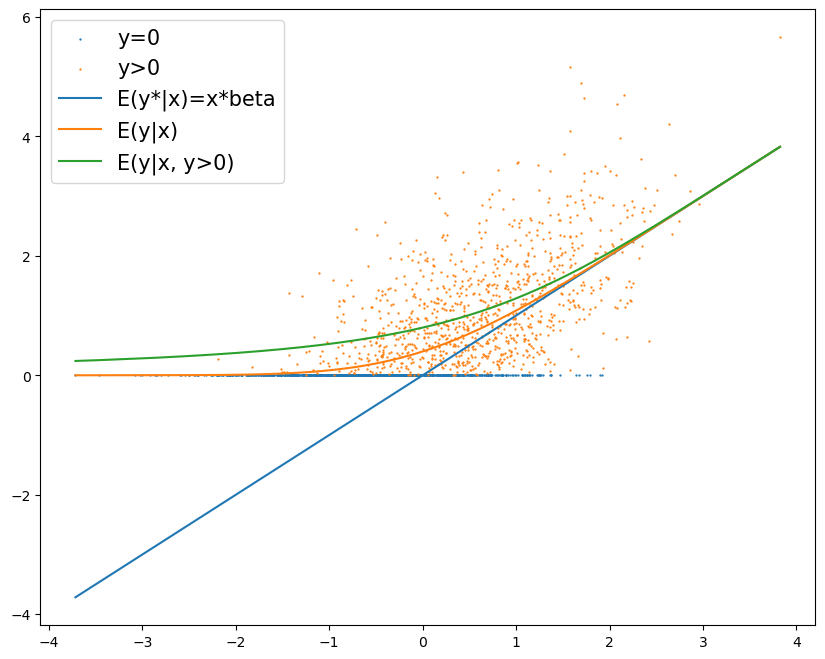

In [9]:
from tobit import * 
N=2000
beta=[0,1]
sigma=1
y, ys, x, u = sim_data(N, beta, sigma) # change parameters to change amount of truncation 
scatter_condmean(beta, sigma, x,y) # scatter with regrssion line using only observed data

# Heteroskedasticity and Non-Normality

## Heteroskedasticity and non-normality

- Assume **heteroskedasticity**:
$$y_i = \max\{0, y_i^\star\}
\qquad\qquad
y_i^\star = x_i\beta + \varepsilon_i
\qquad\qquad
\varepsilon_i \sim \mathcal{N}(0,\sigma^2_i)$$
- **Problem:** The expected score will only be zero if $\sigma^2$ is fixed across observations (*homoskedasticity*).
- Hence, $\widehat{\beta}_{\text{ML}}$ is ***not* consistent** in case of **heteroskedasticity**.
- **The tobit model heavily relies on normality and homoskedasticity of the
errors for consistency of MLE.**
- **Solution?** Extend the model to control for heteroskedasticity and do MLE.
- **Example:** $$\sigma^2_i = \tau^2\exp\{z_i\delta\}$$
- But then you need to make sure the variance of the errors is **well-specified**!

## Neglegted heteroskedasticity and non-normality: Illustration


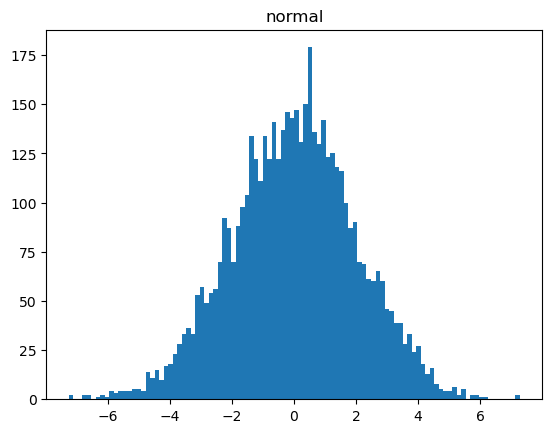

Tobit model
Fractions of observations that are censored:  0.4968
Initial log-likelihood -1.1294385291352453
Initial gradient
 [-0.26195155  0.13590097  0.55016675]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.02287     0.03113     0.73479     0.00001
x1              1.03960     0.02963    35.09051    -0.00001
sigma           1.96905     0.02924    67.34595    -0.00000
# of observations : 5000
# log-likelihood. : -4517.441138649276 

Iteration info: 12 iterations, 13 evaluations of objective, and 13 evaluations of gradients
Elapsed time: 0.0154 seconds



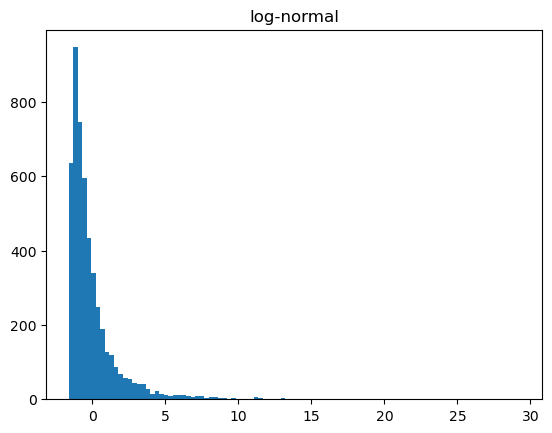

Tobit model
Fractions of observations that are censored:  0.5928
Initial log-likelihood -1.2800594322960002
Initial gradient
 [-0.23572087  0.10334853  0.41705041]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0             -1.35568     0.06840   -19.81866     0.00001
x1              1.59140     0.05980    26.61183     0.00001
sigma           3.16437     0.05257    60.19303     0.00001
# of observations : 5000
# log-likelihood. : -4726.368736299046 

Iteration info: 17 iterations, 18 evaluations of objective, and 18 evaluations of gradients
Elapsed time: 0.0213 seconds



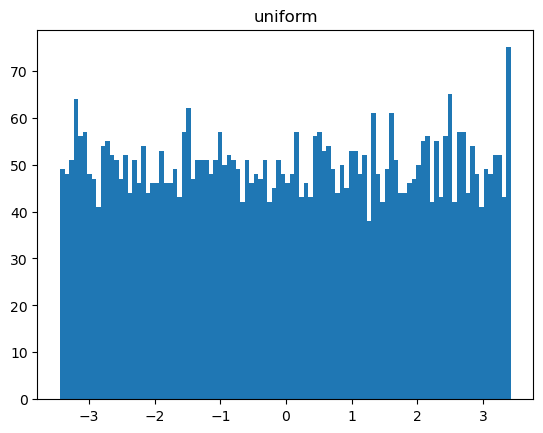

Tobit model
Fractions of observations that are censored:  0.4954
Initial log-likelihood -1.147223121501721
Initial gradient
 [-0.2564684   0.10766622  0.58415934]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.11105     0.03024     3.67202     0.00001
x1              0.87994     0.02996    29.36919    -0.00001
sigma           1.96506     0.02902    67.70751    -0.00000
# of observations : 5000
# log-likelihood. : -4624.560829809247 

Iteration info: 12 iterations, 13 evaluations of objective, and 13 evaluations of gradients
Elapsed time: 0.0153 seconds



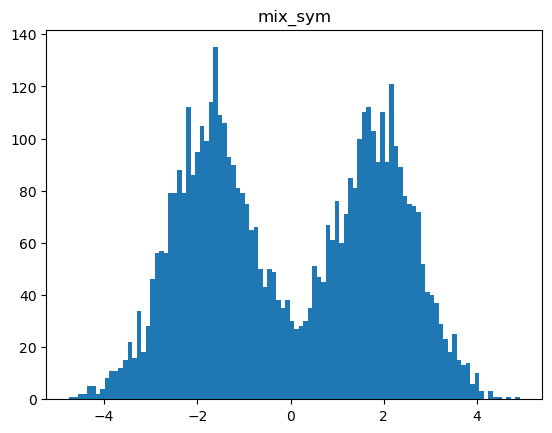

Tobit model
Fractions of observations that are censored:  0.5024
Initial log-likelihood -1.1605753297016537
Initial gradient
 [-0.25790616  0.09953179  0.5966274 ]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.11146     0.03158     3.52878     0.00000
x1              0.80047     0.02789    28.69827    -0.00001
sigma           1.99588     0.02905    68.71119    -0.00000
# of observations : 5000
# log-likelihood. : -4672.328273411011 

Iteration info: 12 iterations, 13 evaluations of objective, and 13 evaluations of gradients
Elapsed time: 0.0149 seconds



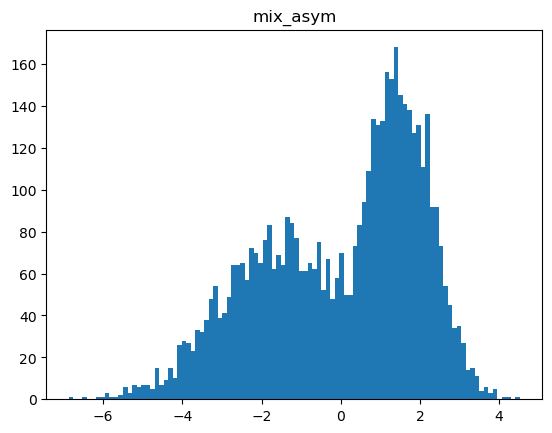

Tobit model
Fractions of observations that are censored:  0.454
Initial log-likelihood -1.0334518085614068
Initial gradient
 [-0.26981178  0.15172573  0.60489811]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0              0.32690     0.02528    12.92860    -0.00000
x1              0.92324     0.02594    35.58605    -0.00000
sigma           1.60292     0.02294    69.85985    -0.00000
# of observations : 5000
# log-likelihood. : -4233.085989108284 

Iteration info: 11 iterations, 12 evaluations of objective, and 12 evaluations of gradients
Elapsed time: 0.0157 seconds



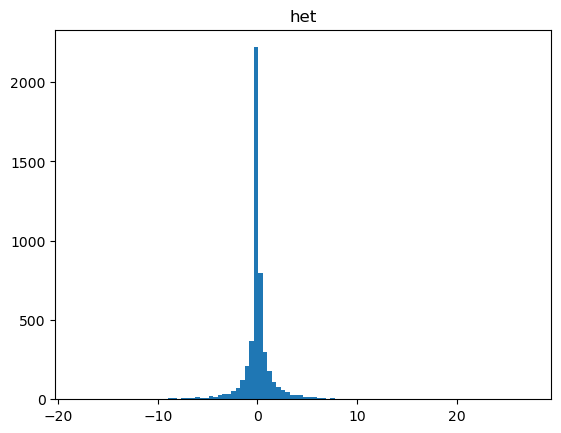

Tobit model
Fractions of observations that are censored:  0.5086
Initial log-likelihood -1.0993287164570738
Initial gradient
 [-0.26523482  0.15955268  0.41568916]
Dep. var. : y 

parnames      theta_hat          se    t-values         jac
----------  -----------  ----------  ----------  ----------
x0             -0.55589     0.03949   -14.07612    -0.00000
x1              1.34213     0.03152    42.58095    -0.00000
sigma           2.11713     0.03101    68.26649    -0.00000
# of observations : 5000
# log-likelihood. : -4293.160452503922 

Iteration info: 13 iterations, 14 evaluations of objective, and 14 evaluations of gradients
Elapsed time: 0.0171 seconds



In [10]:
from tobit import * 
N=5000
beta=[0,1]
sigma=2

for error_type in ['normal',  'log-normal', 'uniform', 'mix_sym', 'mix_asym', 'het']: 
    y, ys, x, u = sim_data(N, beta, sigma, error_type) # change parameters to change amount of truncation 
    fig=plt.hist(u, bins=100)
    plt.title(error_type)
    plt.show()
    res=tobit(y,x, deriv=1);


# Concluding remarks

## Concluding remarks

- The tobit model offers an **appropriate specification** 
for **censored variables**.
- Its relies on **strong distributional assumptions** for **consistency** of MLE.
- **Extensions** are possible, such as **double-censoring**:
$$y_i = \begin{cases}
\tau_0 & \text{if $y_i^\star \leq \tau_0$} \\
y_i^\star & \text{if $\tau_0 < y_i^\star \leq \tau_1$} \\
\tau_1 & \text{if $\tau_1 < y_i^\star$}
\end{cases}$$
- *[Exercise: Derive the log-likelihood of this double-censored model. 
How to identify $\tau_0$ and $\tau_1$?]*
- **Semi-parametric approaches** that relax the distributional assumptions
are possible.